In [56]:
from dataclasses import dataclass
import edgar 
import pandas as pd
import requests
import pandas as pd
import numpy as np
import yfinance as yf
from finstmt import IncomeStatements, BalanceSheets, FinancialStatements
import statsmodels.api as sm
import numpy_financial as npf
import finpie as fp
from pandas_datareader import data
import pandas_datareader as web
import re
import statistics as st
%matplotlib inline
import random
import datetime




In [57]:
ticker = 'MSFT'

In [58]:
#Retrieve statements from data provider
df_inc=pd.read_json('https://discountingcashflows.com/api/income-statement'+'/'+ticker+'/')
df_bs=pd.read_json('https://discountingcashflows.com/api/balance-sheet-statement'+'/'+ticker+'/')

#Formating
df_inc=df_inc.transpose()
df_inc.columns=df_inc.iloc[0]
df_bs=df_bs.transpose()
df_bs.columns=df_bs.iloc[0]
df_inc=df_inc[8:]
df_bs=df_bs[8:]
index_bs=[]
for i in df_bs.index:
    index_bs.append(re.sub(r'(?<=[a-z])(?=[A-Z])', ' ',i))
    
df_bs.index=index_bs

index_inc=[]
for i in df_inc.index:
    index_inc.append(re.sub(r'(?<=[a-z])(?=[A-Z])', ' ',i))
df_inc.index=index_inc

df_bs = df_bs.rename(index={'account Payables':'Payables}'})
df_bs = df_bs.rename(index={'net Receivables':'Receivables}'})
df_inc=df_inc.iloc[:, 0:5]
df_bs=df_bs.iloc[:, 0:5]





In [59]:
#Extract relevant data
inc_data = IncomeStatements.from_df(df_inc)
bs_data = BalanceSheets.from_df(df_bs)
stmts = FinancialStatements(inc_data, bs_data)
stmts





INFO: Was not able to extract data from the following names: {'general And Administrative Expenses', 'total Other Income Expenses Net', 'calculated Income Non Controlling', 'ebitda', 'calculated Operating Expenses', 'calculated Ebitda', 'interest Income', 'gross Profit Ratio', 'cost And Expenses', 'other Expenses', 'eps', 'calculated Net Interest', 'operating Income Ratio', 'final Link', 'net Income Ratio', 'weighted Average Shs Out', 'selling And Marketing Expenses', 'gross Profit', 'calculated Other Expenses', 'income Before Tax', 'calculated Other Income', 'weighted Average Shs Out Dil', 'income Before Tax Ratio', 'ebitdaratio', 'epsdiluted', 'link'}
INFO: Was not able to extract data from the following names: {'capital Lease Obligations', 'intangible Assets', 'tax Payables', 'other Non Current Assets', 'net Debt', 'other Liabilities', 'othertotal Stockholders Equity', 'total Liabilities And Stockholders Equity', 'accumulated Other Comprehensive Income Loss', 'goodwill And Intangibl

C:\Users\Omar\anaconda3\lib\site-packages\finstmt\findata\database.py:82: UserWarning: Found goodwill from "goodwill And Intangible Assets" but already had extracted from "goodwill" which has higher priority, keeping value from "goodwill"
  warnings.warn(f'Found {item_config.key} from "{orig_name}" but already '
C:\Users\Omar\anaconda3\lib\site-packages\finstmt\findata\database.py:82: UserWarning: Found deferred_rev from "deferred Revenue Non Current" but already had extracted from "deferred Revenue" which has higher priority, keeping value from "deferred Revenue"
  warnings.warn(f'Found {item_config.key} from "{orig_name}" but already '


,06/30/2018,06/30/2019,06/30/2020,06/30/2021,06/30/2022
Revenue,"$110,360,000,000","$125,843,000,000","$143,015,000,000","$168,088,000,000","$198,270,000,000"
Cost of Goods Sold,"$38,353,000,000","$42,910,000,000","$46,078,000,000","$52,232,000,000","$62,650,000,000"
Gross Profit,"$72,007,000,000","$82,933,000,000","$96,937,000,000","$115,856,000,000","$135,620,000,000"
R&D Expense,"$14,726,000,000","$16,876,000,000","$19,269,000,000","$20,716,000,000","$24,512,000,000"
SG&A Expense,"$22,223,000,000","$23,098,000,000","$24,709,000,000","$25,224,000,000","$27,725,000,000"
Depreciation & Amortization Expense,"$10,261,000,000","$11,682,000,000","$12,796,000,000","$11,686,000,000","$14,460,000,000"
Other Operating Expenses,-,-,-,-,-
Operating Expense,"$36,949,000,000","$39,974,000,000","$43,978,000,000","$45,940,000,000","$52,237,000,000"
Earnings Before Interest and Taxes,"$35,058,000,000","$42,959,000,000","$52,959,000,000","$69,916,000,000","$83,383,000,000"
Interest Expense,"$2,733,000,000","$2,686,000,000","$2,591,000,000","$2,346,000,000","$2,063,000,000"


In [60]:
frcst=stmts.forecast()
frcst


INFO: Forecasting Income Statement


100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 151.15it/s]

INFO: Forecasting Balance Sheet



100%|█████████████████████████████████████████████████████████████████████████████████| 37/37 [00:00<00:00, 186.10it/s]


INFO: Balancing balance sheet
INFO: Balanced in 0.0s


,06/30/2023,06/30/2024,06/30/2025,06/30/2026,06/30/2027
Revenue,"$222,918,478,177","$250,631,199,439","$281,789,103,559","$316,820,487,881","$356,206,894,708"
Cost of Goods Sold,"$69,110,720,765","$76,237,697,121","$84,099,636,033","$92,772,329,805","$102,339,386,749"
Gross Profit,"$153,807,757,412","$174,393,502,318","$197,689,467,526","$224,048,158,076","$253,867,507,959"
R&D Expense,"$27,141,730,775","$30,053,588,017","$33,277,839,212","$36,847,999,048","$40,801,177,781"
SG&A Expense,"$28,979,129,027","$30,289,988,067","$31,660,143,280","$33,092,276,902","$34,589,192,503"
Depreciation & Amortization Expense,"$15,486,882,881","$16,586,690,275","$17,764,600,945","$19,026,161,429","$20,377,312,153"
Other Operating Expenses,-,-,-,-,-
Operating Expense,"$71,607,742,683","$76,930,266,359","$82,702,583,437","$88,966,437,380","$95,767,682,437"
Earnings Before Interest and Taxes,"$82,200,014,729","$97,463,235,960","$114,986,884,089","$135,081,720,696","$158,099,825,522"
Interest Expense,"$1,950,250,292","$1,843,688,732","$1,742,973,821","$1,647,783,041","$1,557,811,791"


In [61]:
stmts.forecast_assumptions

,Method,% of,Cap,Floor,Plug,Manual Levels
Revenue,cagr,None,None,None,False,NaN
Cost of Goods Sold,cagr,revenue,None,None,False,NaN
R&D Expense,cagr,None,None,None,False,NaN
SG&A Expense,cagr,None,None,None,False,NaN
Depreciation & Amortization Expense,cagr,None,None,None,False,NaN
Interest Expense,cagr,total_debt,None,None,False,NaN
Income Tax Expense,cagr,ebt,None,None,False,NaN
Cash and Cash Equivalents,manual,None,None,None,True,"[66483836989.9964, 95004559565.12776, 14082467..."
Short-Term Investments,cagr,None,None,None,False,NaN
Receivables,cagr,revenue,None,None,False,NaN


## WACC

In [62]:
#Obtain share prices past 5 periods:
date_list=['2022','2021','2020','2019','2018']
price_list=[]
for i in date_list:
    stock = yf.Ticker(ticker)
    data = yf.download(ticker, period = "5y", interval='1mo')
    price_list
    prices=data['Close'].dropna()
    prices=pd.DataFrame(prices)
    price=prices.loc[i+'-06-01'][0]
    price_list.append(price)

shares_outstanding = df_inc.loc['weighted Average Shs Out']
market_cap =shares_outstanding*price_list
market_cap=market_cap.iloc[::-1]

# calculate beta
stock = yf.Ticker(ticker)
data = yf.download(ticker+" SPY", start="2016-01-01", end="2022-08-01", interval="1mo")
prices=data['Close'].reset_index()
prices.drop('Date', inplace=True, axis=1)
prices=prices[['SPY',ticker]]
returns=prices.pct_change()
risk_free= 0.03
erp=0.05
returns['MRP'] = returns['SPY']-risk_free
returns=returns.dropna()
X = sm.add_constant(returns['MRP'])
y = returns[ticker]
model = sm.OLS(y, X)
results = model.fit()
beta = results.params['MRP']
print('The Beta is', beta)

# Calculate WACC
cost_of_equity = risk_free+erp*beta
tax_rate=stmts.tax_exp[4]/stmts.ebt[4]
cost_of_debt=stmts.int_exp[4]/stmts.total_debt[4]
weight_of_equity=market_cap[4]/(market_cap[4]+stmts.total_debt[4])
weight_of_debt=stmts.total_debt[4]/(market_cap[4]+stmts.total_debt[4])
WACC = ((cost_of_equity*weight_of_equity)+cost_of_debt*(1-tax_rate)*weight_of_debt)
print('The WACC is', WACC*100)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  2 of 2 completed
The Beta is 0.9523030717602846
The WACC is 7.611954378423702


C:\Users\Omar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Valuation

In [64]:
# ev/ebitda
enterprise_value = stmts.total_debt[4]+market_cap[4]-stmts.cash[4]
ev_ebitda=enterprise_value/df_inc.loc['ebitda'][0]
frcst_ebitda=frcst.ebit[4]+frcst.dep[4]
terminal_value=frcst_ebitda*ev_ebitda
li=(frcst.fcf[1],frcst.fcf[2], frcst.fcf[3],frcst.fcf[4],terminal_value)
ev = npf.npv(WACC,li)
print('The Enterprise Value is',ev)
print('The Fair price is',ev/shares_outstanding[0])

The Enterprise Value is 2639515422017.808
The Fair price is 352.1231886363138


In [66]:
#preptual growth
LTGrowth = 0.02
terminal_value = frcst.fcf[4] * (1+ LTGrowth) /(WACC  - LTGrowth)
li=(frcst.fcf[1],frcst.fcf[2], frcst.fcf[3],frcst.fcf[4],terminal_value)
ev = npf.npv(WACC,li)
print('The Enterprise Value is',ev)
print('The Fair price is',ev/shares_outstanding[0])

The Enterprise Value is 1892897976454.1511
The Fair price is 252.52107476709594


## Monte Carlo Simulation

In [75]:
@dataclass
class ModelInputs:
    ebitda: int = df_inc.loc['ebitda'][0]
    frcst_ebitda: int = frcst_ebitda
    WACC: int = ((cost_of_equity*weight_of_equity)+cost_of_debt*(1-tax_rate)*weight_of_debt)
    enterprise_value: int = stmts.total_debt[4]+market_cap[4]-stmts.cash[4]

model_data = ModelInputs()
model_data

WACC_range = (0.05,0.06,0.07,0.08,0.09)
@dataclass
class SimluationInputs:
    n_iterations: int = 5000
    frcst_ebitda_std: int = st.stdev(frcst.ebit+frcst.dep)
    WACC_std: int = st.stdev(WACC_range)
    ebitda_std: int = st.stdev(df_inc.loc['ebitda'])
    enterprise_value_std: int = st.stdev(stmts.total_debt+market_cap-stmts.cash)

        
sim_data = SimluationInputs()
sim_data

def fair_value(data: ModelInputs, print_output=True):
    enterprise_value = stmts.total_debt[4]+market_cap[4]-stmts.cash[4]
    ebitda: int = df_inc.loc['ebitda'][0]
    ev_ebitda=enterprise_value/df_inc.loc['ebitda'][0]
    frcst_ebitda=frcst.ebit[4]+frcst.dep[4]
    terminal_value=frcst_ebitda*ev_ebitda
    WACC = ((cost_of_equity*weight_of_equity)+cost_of_debt*(1-tax_rate)*weight_of_debt)

    

    li=(frcst.fcf[1],frcst.fcf[2], frcst.fcf[3],frcst.fcf[4],terminal_value)
    ev = npf.npv(WACC,li)
    fair_price=ev/shares_outstanding[0]
    return fair_price

In [76]:
def random_normal_positive(mean, std):
    """
    This function keeps drawing random numbers from a normal distribution until it gets a positive number,
    then it returns that number.
    """
    drawn_value = -1  # initialize to some negative number so that the while loop will start
    while drawn_value < 0:
        drawn_value = random.normalvariate(mean, std)
    return drawn_value

def fair_value_simulation_inputs(data, sim_data):

    frcst_ebitda = random_normal_positive(data.frcst_ebitda, sim_data.frcst_ebitda_std)
    WACC = random_normal_positive(data.WACC, sim_data.WACC_std)
    ebitda = random_normal_positive(data.ebitda, sim_data.ebitda_std) 
    enterprise_value = random_normal_positive(data.enterprise_value, sim_data.enterprise_value_std) 


    
    return (
        frcst_ebitda,
        WACC,
        ebitda,
        enterprise_value,
        
        
    )
    

In [77]:
def fair_value_single_simulation(data, sim_data):
    # Draw values of inputs from normal distributions
    (
        frcst_ebitda,WACC,ebitda,enterprise_value
    ) = fair_value_simulation_inputs(data, sim_data)
    
    # Construct model inputs
    new_data = ModelInputs(
        frcst_ebitda=frcst_ebitda,
        WACC = WACC,
        ebitda=ebitda,
        enterprise_value=enterprise_value
    )

    # Run model
    ytr = fair_value(new_data, print_output=False)
    ev_ebitda=enterprise_value/ebitda
    terminal_value=frcst_ebitda*ev_ebitda


    li=(frcst.fcf[1],frcst.fcf[2], frcst.fcf[3],frcst.fcf[4],terminal_value)
    ev = npf.npv(WACC,li)
    fair_price=ev/shares_outstanding[0]
    
    return (
        fair_price, terminal_value, WACC*100, ev_ebitda, 
    )

In [78]:
def styled_df(df):

    return df.style.format({
        'Fair Price': '${:,.0f}', 
        'Terminal Value': '${:,.0f}', 
        'WACC': '{:,.0f}%',
        'EV/EBITDA':'{:,.0f}',
        
        
    }).background_gradient(cmap='RdYlGn', subset='Fair Price')
def fair_value_mc(data, sim_data):

    all_results = [fair_value_single_simulation(data, sim_data) for i in range(sim_data.n_iterations)]
        
    df = pd.DataFrame( all_results,columns=['Fair Price', 'Terminal Value', 'WACC', 'EV/EBITDA'])
    return df
df = fair_value_mc(model_data, sim_data)



## Fair Price Distribution 

<AxesSubplot:ylabel='Frequency'>

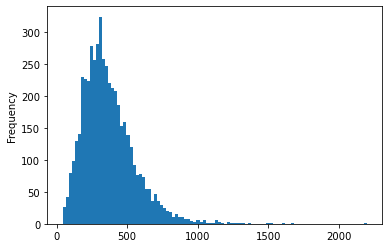

In [79]:
df['Fair Price'].plot.hist(bins=100)

## Inputs and Fair Price Probability 

In [80]:
quants = df.quantile([i / 20 for i in range(1, 20)])
styled_df(quants)

,Fair Price,Terminal Value,WACC,EV/EBITDA
0.05,$129,"$861,040,339,859",5%,10
0.1,$170,"$1,272,893,494,735",6%,12
0.15,$194,"$1,514,362,745,674",6%,13
0.2,$218,"$1,753,685,190,562",6%,14
0.25,$240,"$1,995,667,784,637",6%,15
0.3,$260,"$2,193,070,521,094",7%,16
0.35,$280,"$2,393,684,105,278",7%,17
0.4,$299,"$2,573,130,570,108",7%,18
0.45,$316,"$2,749,859,102,398",7%,19
0.5,$336,"$2,949,019,467,022",8%,20


### Plots of Inputs vs. Fair Price 


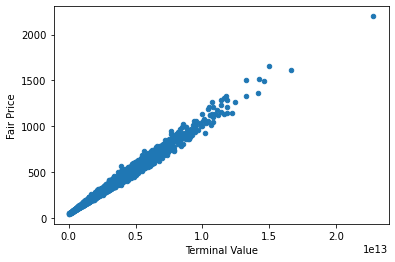

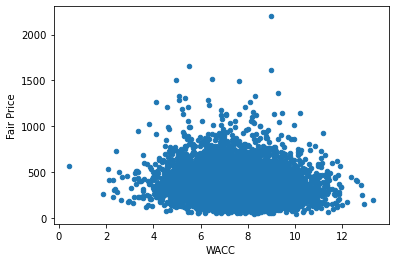

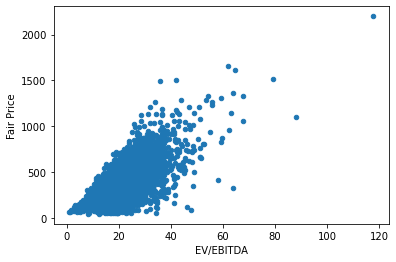

In [81]:
input_cols = [
    'Terminal Value', 
    'WACC',
    'EV/EBITDA'
]

for col in input_cols:
    df.plot.scatter(y='Fair Price', x=col)